# Multi-Class Text Classififcation Task
##### By Mohamed Sebaie Sebaie Youssef 

In [1]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#NLP imports
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Classification imports
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2

#Models
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB, BernoulliNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M-Sebaie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Steps
<ol>
    
    1.Loading Data into a dataframe.
    
    2.Visualizing data.
    
    3.Preprocessing data.
    
    4.Splitting data into test and train datasets.
    
    5.Handel the Imbalance with Train Data
    
    6.Model Selection
    
    7.Save Model As PKL for Deployment

### 1. Load Data 

In [2]:
#loading data into a dataframe.
df = pd.read_csv("Job titles and industries.csv")
df.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [3]:
df.shape

(8586, 2)

In [4]:
df.rename(columns = {'job title':'job_title'}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [6]:
df.describe(include=object)

,job_title,industry
count,8586,8586
unique,3890,4
top,marketing executive,IT
freq,91,4746


In [7]:
print(f"There are only {len(df['job_title'].unique())} unique entries in job titles.")

There are only 3890 unique entries in job titles.


In [8]:
print(f"There are {len(df['industry'].unique())} Classes in the data: {df['industry'].unique()}")

There are 4 Classes in the data: ['IT' 'Marketing' 'Education' 'Accountancy']


### 2. Visualize the distribution of classes.

In [9]:
df["industry"].value_counts()

IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

<Figure size 720x432 with 0 Axes>

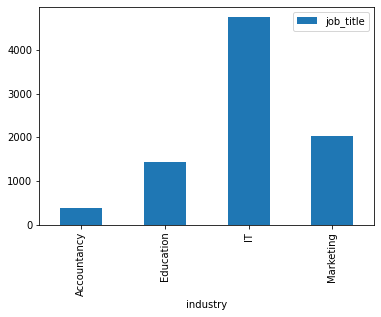

In [10]:
plt.figure(figsize=(10,6));
df.groupby('industry').count().plot.bar(ylim=0);
plt.show();

### 3. Pre-processing

In [11]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['job_title'] = df['job_title'].apply(clean_text)

### 4. Splitting Data Into Train and Test Datasets 

In [12]:
df["industry"].value_counts()

IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

<Figure size 720x432 with 0 Axes>

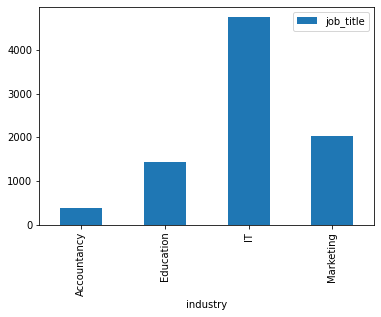

In [13]:
plt.figure(figsize=(10,6));
df.groupby('industry').count().plot.bar(ylim=0);
plt.show();

In [14]:
X = df['job_title']
y = df['industry']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42,stratify=y)


### 5. Dealing With Class Imbalance with Train Data

In [15]:
X_train = X_train.values
y_train = y_train.values

In [16]:
X_train=X_train.reshape(-1,1)

In [17]:
X_train.shape

(6010, 1)

In [18]:
y_train.shape

(6010,)

In [19]:
sm = SMOTEN(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
X_train_res.shape

In [20]:
y_train_res.shape

(13288,)

In [21]:
dfTrain_Resample = pd.DataFrame(data=np.column_stack((X_train_res, y_train_res)),columns=['job_title','industry'])
dfTrain_Resample

,job_title,industry
0,senior net developer,IT
1,marketing manager b2b events,Marketing
2,global marketing director global vp,Marketing
3,junior graduate full stack developer,IT
4,quality control analyst,IT
...,...,...
13283,crm retention specialist,Marketing
13284,crm retention specialist,Marketing
13285,crm retention specialist,Marketing
13286,crm retention specialist,Marketing


In [22]:
dfTrain_Resample['industry'].value_counts()

Marketing      3322
Accountancy    3322
Education      3322
IT             3322
Name: industry, dtype: int64

<Figure size 720x432 with 0 Axes>

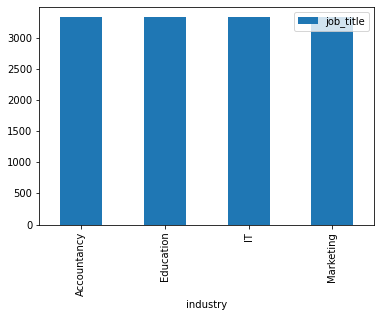

In [23]:
plt.figure(figsize=(10,6));
dfTrain_Resample.groupby('industry').count().plot.bar(ylim=0);

In [24]:
dfTest = pd.DataFrame(data=np.column_stack((X_test, y_test)),columns=['job_title','industry'])
dfTest

,job_title,industry
0,senior web designer,Marketing
1,publications coordnator,Marketing
2,senior service engineer,IT
3,network analyst,IT
4,contact centre engineer genesys london,IT
...,...,...
2571,maths teaching assistant west london,Education
2572,qa engineer,IT
2573,python engineer,IT
2574,lead data engineer,IT


In [25]:
dfTest['industry'].value_counts()

IT             1424
Marketing       609
Education       431
Accountancy     112
Name: industry, dtype: int64

<Figure size 720x432 with 0 Axes>

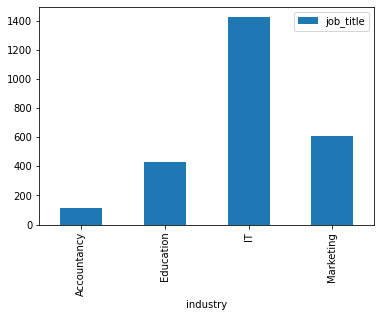

In [26]:
plt.figure(figsize=(10,6));
dfTest.groupby('industry').count().plot.bar(ylim=0);

### 6. Model Selection

In [27]:
X_train = dfTrain_Resample['job_title']
y_train = dfTrain_Resample['industry']

In [28]:
def predictC(StringjobTitle,model):
    df = pd.DataFrame({'T':[StringjobTitle]})
    df['T'] = df['T'].apply(clean_text)
    pred=model.predict(df['T']) 
    return pred[0] 

#### Approach 1: Naive Bayes Classifier for MultiNomial

In [29]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print('Train accuracy:',nb.score(X_train, y_train))
print('Test accuracy:', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Train accuracy: 0.9644792293798916
Test accuracy: 0.9118788819875776
              precision    recall  f1-score   support

 Accountancy       0.84      0.76      0.80       112
   Education       0.94      0.84      0.88       431
          IT       0.93      0.96      0.94      1424
   Marketing       0.86      0.89      0.87       609

    accuracy                           0.91      2576
   macro avg       0.89      0.86      0.88      2576
weighted avg       0.91      0.91      0.91      2576



In [30]:
y_pred = predictC("Accountant",nb)
y_pred

'Accountancy'

#### Approach 2: Naive Bayes Classifier for BernoulliNB

In [31]:
br = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', BernoulliNB())])

br.fit(X_train, y_train)

y_pred = br.predict(X_test)
print('Train accuracy:', br.score(X_train, y_train))
print('Test accuracy:',accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Train accuracy: 0.9526640577965081
Test accuracy: 0.8893633540372671
              precision    recall  f1-score   support

 Accountancy       0.82      0.57      0.67       112
   Education       0.88      0.83      0.85       431
          IT       0.92      0.94      0.93      1424
   Marketing       0.82      0.86      0.84       609

    accuracy                           0.89      2576
   macro avg       0.86      0.80      0.83      2576
weighted avg       0.89      0.89      0.89      2576



In [32]:
y_pred = predictC("Accountant",br)
y_pred

'Marketing'

#### Approach 3: SGD Classifier and Loss Function is `hinge`, which gives a `linear SVM`.

In [33]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge',random_state=0))])

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
print('Train accuracy:',sgd.score(X_train, y_train))
print('Test accuracy:',accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Train accuracy: 0.973735701384708
Test accuracy: 0.9324534161490683
              precision    recall  f1-score   support

 Accountancy       0.90      0.82      0.86       112
   Education       0.97      0.86      0.92       431
          IT       0.94      0.97      0.96      1424
   Marketing       0.90      0.90      0.90       609

    accuracy                           0.93      2576
   macro avg       0.93      0.89      0.91      2576
weighted avg       0.93      0.93      0.93      2576



In [34]:
y_pred = predictC("Accountant",sgd)
y_pred

'Accountancy'

#### Approach 4: CatBoost Classifier

In [41]:
cb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', CatBoostClassifier(verbose=False))])

cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)
print('Train accuracy',cb.score(X_train, y_train))
print('Test accuracy' ,accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Train accuracy 0.9678657435279951
Test accuracy 0.9095496894409938
              precision    recall  f1-score   support

 Accountancy       0.94      0.73      0.82       112
   Education       0.93      0.83      0.87       431
          IT       0.91      0.97      0.94      1424
   Marketing       0.89      0.85      0.87       609

    accuracy                           0.91      2576
   macro avg       0.92      0.85      0.88      2576
weighted avg       0.91      0.91      0.91      2576



#### Approach 5: Random Forest Classifier Model

In [35]:
rf = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(random_state=0))])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Train accuracy',rf.score(X_train, y_train))
print('Test accuracy', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Train accuracy 0.9896146899458158
Test accuracy 0.9328416149068323
              precision    recall  f1-score   support

 Accountancy       0.96      0.80      0.87       112
   Education       0.93      0.88      0.90       431
          IT       0.95      0.97      0.96      1424
   Marketing       0.88      0.90      0.89       609

    accuracy                           0.93      2576
   macro avg       0.93      0.89      0.91      2576
weighted avg       0.93      0.93      0.93      2576



#### Approach 6: XGBOOST Classifier Model

In [36]:
xgb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier(random_state=0))])

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('Train accuracy',xgb.score(X_train, y_train))
print('Test accuracy', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy 0.975842865743528
Test accuracy 0.9184782608695652
              precision    recall  f1-score   support

 Accountancy       0.95      0.78      0.85       112
   Education       0.94      0.84      0.88       431
          IT       0.92      0.98      0.95      1424
   Marketing       0.89      0.87      0.88       609

    accuracy                           0.92      2576
   macro avg       0.92      0.86      0.89      2576
weighted avg       0.92      0.92      0.92      2576



### As we See that seems SGD Classifier with hinge Loss Function (linear SVM) is the best and it is nearly to Random Forrest but it is less over fitting that Random Forrest.

### Showing the Heat Map

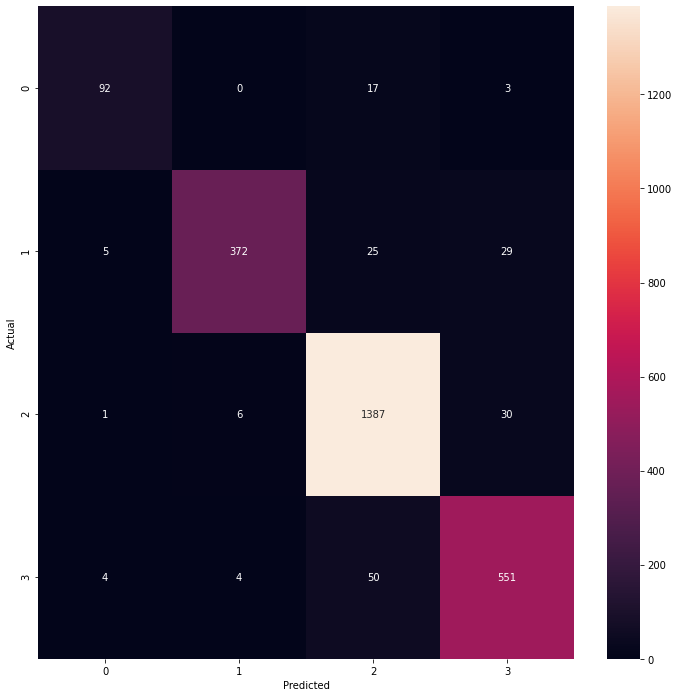

In [37]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, sgd.predict(X_test))
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [38]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != sgd.predict(X_test)).sum()))

Number of mislabeled points out of a total 2576 points : 174


In [39]:
print(classification_report(y_test, sgd.predict(X_test)))

              precision    recall  f1-score   support

 Accountancy       0.90      0.82      0.86       112
   Education       0.97      0.86      0.92       431
          IT       0.94      0.97      0.96      1424
   Marketing       0.90      0.90      0.90       609

    accuracy                           0.93      2576
   macro avg       0.93      0.89      0.91      2576
weighted avg       0.93      0.93      0.93      2576



### As we see from Heat Map and Classification Report of SGD Model, We can say it is the best model with these coditions as it is around 6.5% error

### 7. Save SGD Model as Pickle_File for The Deployment

In [42]:
import joblib
joblib.dump(sgd, 'SGD_model.pkl')

['SGD_model.pkl']

___________________________________________________________

### Answer the following questions:


#### 1. Which techniques you have used while cleaning the data if you have cleaned it?

I used NLTK Library as i download Stopwords to remove it from our data then use the regex to remove spaces and bad symbols besides lower case all words.

#### 2. Why have you chosen this classifier?

I used SGD Model with hinge Loss Function (linear SVM) because SGD has been successfully applied to large-scale and sparse machine learning problems as text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features. Though it is Efficiency and Ease of implementation besides for sure gives the highest Accuracy


#### 3. How do you deal with (Imbalance learning)?

I used SMOTEN as Over Sampling technique but after spliting the data and SMOTEN because It expects that the data to resample are only made of categorical features and it improves the accuracy.

#### 4. How can you extend the model to have better performance?

We can try different techniques for cleaning and vectorize the data to get best performance and the data imbalance is big issue, though we could try to scrape more data, besides more hyperparameter tuning will increase the performance.

#### 5. How do you evaluate your model? (i.e. accuracy, F1 score, Recall)

F1 Score and Accuracy

#### 6. What are the limitations of your methodology or Where does your approach fail?

Accountancy and Education Classes not as good as other Classes because the imbalance data and the data so biased to IT Class, Though for sure more data will definitly improve the performance and Accuracy and we need more time for the data preprocessing and cleaning.

### It Should be Noted That I Checked two Models Random Forrest and SGD the two have some errors in the Accountancy and Education

__________________________________________________________________